In [1]:
!pip install vizard

  Created wheel for vizard: filename=vizard-1.2.2-py3-none-any.whl size=11866 sha256=b89d3198b8eddd3a7d1bcafdd27ffa6071755409dcf03d7f23033c091d910203
  Stored in directory: /root/.cache/pip/wheels/0f/b3/7d/0771f7af4b22259b1a19446bdc9c0329a19727e9274e5ad8e5
Successfully built vizard


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm

import vizard

pd.options.display.max_colwidth = None
sns.set_style('darkgrid')

# Data

In [3]:
!unzip ../input/home-depot-product-search-relevance/product_descriptions.csv.zip
!unzip ../input/home-depot-product-search-relevance/train.csv.zip
!unzip ../input/home-depot-product-search-relevance/test.csv.zip

Archive:  ../input/home-depot-product-search-relevance/product_descriptions.csv.zip
  inflating: product_descriptions.csv  
Archive:  ../input/home-depot-product-search-relevance/train.csv.zip
  inflating: train.csv               
Archive:  ../input/home-depot-product-search-relevance/test.csv.zip
  inflating: test.csv                


In [4]:
product_description = pd.read_csv('product_descriptions.csv')
print(product_description.shape)
product_description.head()

(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
1,100002,"BEHR Premium Textured DECKOVER is an innovative solid color coating. It will bring your old, weathered wood or concrete back to life. The advanced 100% acrylic resin formula creates a durable coating for your tired and worn out deck, rejuvenating to a whole new look. For the best results, be sure to properly prepare the surface using other applicable BEHR products displayed above.California residents: see&nbsp;Proposition 65 informationRevives wood and composite decks, railings, porches and boat docks, also great for concrete pool decks, patios and sidewalks100% acrylic solid color coatingResists cracking and peeling and conceals splinters and cracks up to 1/4 in.Provides a durable, mildew resistant finishCovers up to 75 sq. ft. in 2 coats per gallonCreates a textured, slip-resistant finishFor best results, prepare with the appropriate BEHR product for your wood or concrete surfaceActual paint colors may vary from on-screen and printer representationsColors available to be tinted in most storesOnline Price includes Paint Care fee in the following states: CA, CO, CT, ME, MN, OR, RI, VT"
2,100003,"Classic architecture meets contemporary design in the Ensemble Curve series, made of solid Vikrell material, blending sleek, clean lines with gentle curves. Corner shelving is perfect for storing bath accessories. Modular design allows it to be moved around corners and through doorways with ease. Curve wall with a smooth, contemporary look, featuring integrated storage shelves.Slightly narrower for tighter spacesDesigned with an 18 in. apronDurable high-gloss finish provides a smooth, shiny surface that is easy to cleanConforms to ANSI Z124.1.2 and CSA B45.1 national consensus standardsCurve wall with a smooth, contemporary look, featuring integrated storage shelves"
3,100004,"The Grape Solar 265-Watt Polycrystalline PV Solar Panel bonus pack bundles 4 Grape Solar 265-Watt solar panels for extra savings. The Grape Solar 265-Watt Polycrystalline PV Solar Panel uses high efficiency solar cells (approximately 19%) made from quality silicon material for high module conversion efficiency, long term output stability, and reliability. Virtually maintenance free. High transmittance, low iron tempered glass for durability and enhanced impact resistance.Positive power tolerance (0 to +5-Watt)Anti-reflective and anti-soiling surface reduces power loss from dirt and dustOutstanding performance in low-light irradiances environmentsCertified to withstand high wind and snow loads100% electroluminescence inspection ensures modules are defect freePositive and negative leads quipped with MC4 connectors"
4,100005,"Update your bathroom with the Delta Vero Single-Handle Shower Faucet Trim Kit in Chrome. It has a sleek, modern and minimalistic aesthetic. The MultiChoice universal valve keeps the water temperature within +/-3 degrees Fahrenheit to help prevent scalding.California residents: see&nbsp;Proposition 65 informationIncludes the trim kit only, the rough-in kit (R10000-UNBX) is sold separatelyIncludes the handleMaintains a balanced pressure of hot and cold water e

In [5]:
dtrain = pd.read_csv('train.csv', encoding='latin-1').merge(product_description, on='product_uid')
print(dtrain.shape)
dtrain.head()

(74067, 6)


,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 Tugboat Wood and Concrete Coating,deck over,3.00,"BEHR Premium Textured DECKOVER is an innovative solid color coating. It will bring your old, weathered wood or concrete back to life. The advanced 100% acrylic resin formula creates a durable coating for your tired and worn out deck, rejuvenating to a whole new look. For the best results, be sure to properly prepare the surface using other applicable BEHR products displayed above.California residents: see&nbsp;Proposition 65 informationRevives wood and composite decks, railings, porches and boat docks, also great for concrete pool decks, patios and sidewalks100% acrylic solid color coatingResists cracking and peeling and conceals splinters and cracks up to 1/4 in.Provides a durable, mildew resistant finishCovers up to 75 sq. ft. in 2 coats per gallonCreates a textured, slip-resistant finishFor best results, prepare with the appropriate BEHR product for your wood or concrete surfaceActual paint colors may vary from on-screen and printer representationsColors available to be tinted in most storesOnline Price includes Paint Care fee in the following states: CA, CO, CT, ME, MN, OR, RI, VT"
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included),rain shower head,2.33,"Update your bathroom with the Delta Vero Single-Handle Shower Faucet Trim Kit in Chrome. It has a sleek, modern and minimalistic aesthetic. The MultiChoice universal valve keeps the water temperature within +/-3 degrees Fahrenheit to help prevent scalding.California residents: see&nbsp;Proposition 65 informationIncludes the trim kit only, the rough-in kit (R10000-UNBX) is sold separatelyIncludes the handleMaintains a balanced pressure of hot and cold water even when a valve is turned on or off elsewhere in the systemDue to WaterSense regulations in the state of New York, please confirm your shipping zip code is not restricted from use of items that do not meet WaterSense qualifications"
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not

In [6]:
dtest = pd.read_csv('test.csv', encoding='latin-1').merge(product_description, on='product_uid')
print(dtest.shape)
dtest.head()

(166693, 5)


,id,product_uid,product_title,search_term,product_description
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or

# Cleaning

In [7]:
from tqdm.auto import tqdm
from sklearn.base import BaseEstimator, TransformerMixin
import re, spacy


class TextCleaner(BaseEstimator, TransformerMixin):
    """A general purpose text cleaning pipeline which utilizes `spacy` and regex to:
        * lower cases the text
        * removes urls and emails
        * removes html css and js
        * removes stop words
        * performs lemmatization
        * removes numbers, punctuations
        * trims white spaces

    Args:
        model (str): spacy language model, default: en
    """

    def __init__(self, model="en"):
        self.nlp = spacy.load(model, disable=["parser", "ner"])

    def fit(self, X=None):
        return self

    def transform(self, X):
        transformed = []
        for x in tqdm(X):
            x = str(x).strip().lower()  # Lower case the data
            x = re.sub(r"""((http[s]?://)[^ <>'"{}|\^`[\]]*)""", r" ", x)  # remove urls
            x = re.sub(
                r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", r" ", x
            )  # remove emails
            x = re.sub(r"<style.*>[\s\S]+</style>", " ", x)  # remove css
            x = re.sub(r"<script.*>[\s\S]*</script>", " ", x)  # remove js
            x = re.sub(
                r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", x
            )  # remove html

            if len(x) != 0:
                parsed = self.nlp(x)
                lemmatized = " ".join([w.lemma_ for w in parsed if not w.is_stop])

                # Remove punct
                punct_removed = re.sub(r"\W", " ", str(lemmatized))
                punct_removed = re.sub(r"\d", " ", str(punct_removed))
                punct_removed = re.sub(r"\s+", " ", str(punct_removed))
            else:
                punct_removed = x
            transformed.append(punct_removed)
        return transformed

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [8]:
# textcleaner = TextCleaner()
# all_text = pd.DataFrame({
#     'raw_text': dtrain['product_title'].values.tolist() + dtrain['search_term'].values.tolist() + 
#     dtest['product_title'].values.tolist() + dtest['search_term'].values.tolist() + 
#     product_description['product_description'].values.tolist()
# }).drop_duplicates().reset_index(drop=True)
# all_text['cleaned_text'] = textcleaner.fit_transform(all_text['raw_text'])

# all_text.to_csv('home-depot-product-search-relevance.csv', index=False)

text_map = pd.read_csv('../input/qqp-cleaned/home-depot-product-search-relevance.csv')
text_map = {x:y for x, y in zip(text_map['raw_text'].values, text_map['cleaned_text'].values)}

dtrain['product_title'] = dtrain['product_title'].apply(lambda x: text_map[x])
dtrain['product_description'] = dtrain['product_description'].apply(lambda x: text_map[x])
dtrain['search_term'] = dtrain['search_term'].apply(lambda x: text_map[x])
dtest['product_title']  =  dtest['product_title'].apply(lambda x: text_map[x])
dtest['product_description']  =  dtest['product_description'].apply(lambda x: text_map[x])
dtest['search_term']  =  dtest['search_term'].apply(lambda x: text_map[x])

del text_map

# Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

title_vectorizer = TfidfVectorizer(sublinear_tf=True).fit(
    pd.concat([dtrain['product_title'], dtest['product_title']], axis=0).drop_duplicates().dropna()
)
description_vectorizer = TfidfVectorizer(sublinear_tf=True).fit(
    pd.concat([dtrain['product_description'], dtest['product_description']], axis=0).drop_duplicates().dropna()
)
search_vectorizer = TfidfVectorizer(sublinear_tf=True).fit(
    pd.concat([dtrain['search_term'], dtest['search_term']], axis=0).drop_duplicates().dropna()
)


train_title = title_vectorizer.transform(dtrain['product_title'].fillna(''))
test_title = title_vectorizer.transform(dtest['product_title'].fillna(''))
train_description = description_vectorizer.transform(dtrain['product_description'].fillna(''))
test_description = description_vectorizer.transform(dtest['product_description'].fillna(''))
train_search = search_vectorizer.transform(dtrain['search_term'].fillna(''))
test_search = search_vectorizer.transform(dtest['search_term'].fillna(''))

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.base import BaseEstimator, TransformerMixin


class ConvertToSparseTensor(BaseEstimator, TransformerMixin):
    """A utiliy to convert sparse vectors into sparse tensors"""

    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        coo = X.tocoo()
        indices = np.mat([coo.row, coo.col]).transpose()
        return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))


In [11]:
cvt_to_tensors = ConvertToSparseTensor().fit(None)
train_title = cvt_to_tensors.transform(train_title)
test_title = cvt_to_tensors.transform(test_title)
train_description = cvt_to_tensors.transform(train_description)
test_description = cvt_to_tensors.transform(test_description)
train_search = cvt_to_tensors.transform(train_search)
test_search = cvt_to_tensors.transform(test_search)

y_train = dtrain['relevance'].values

# Modelling

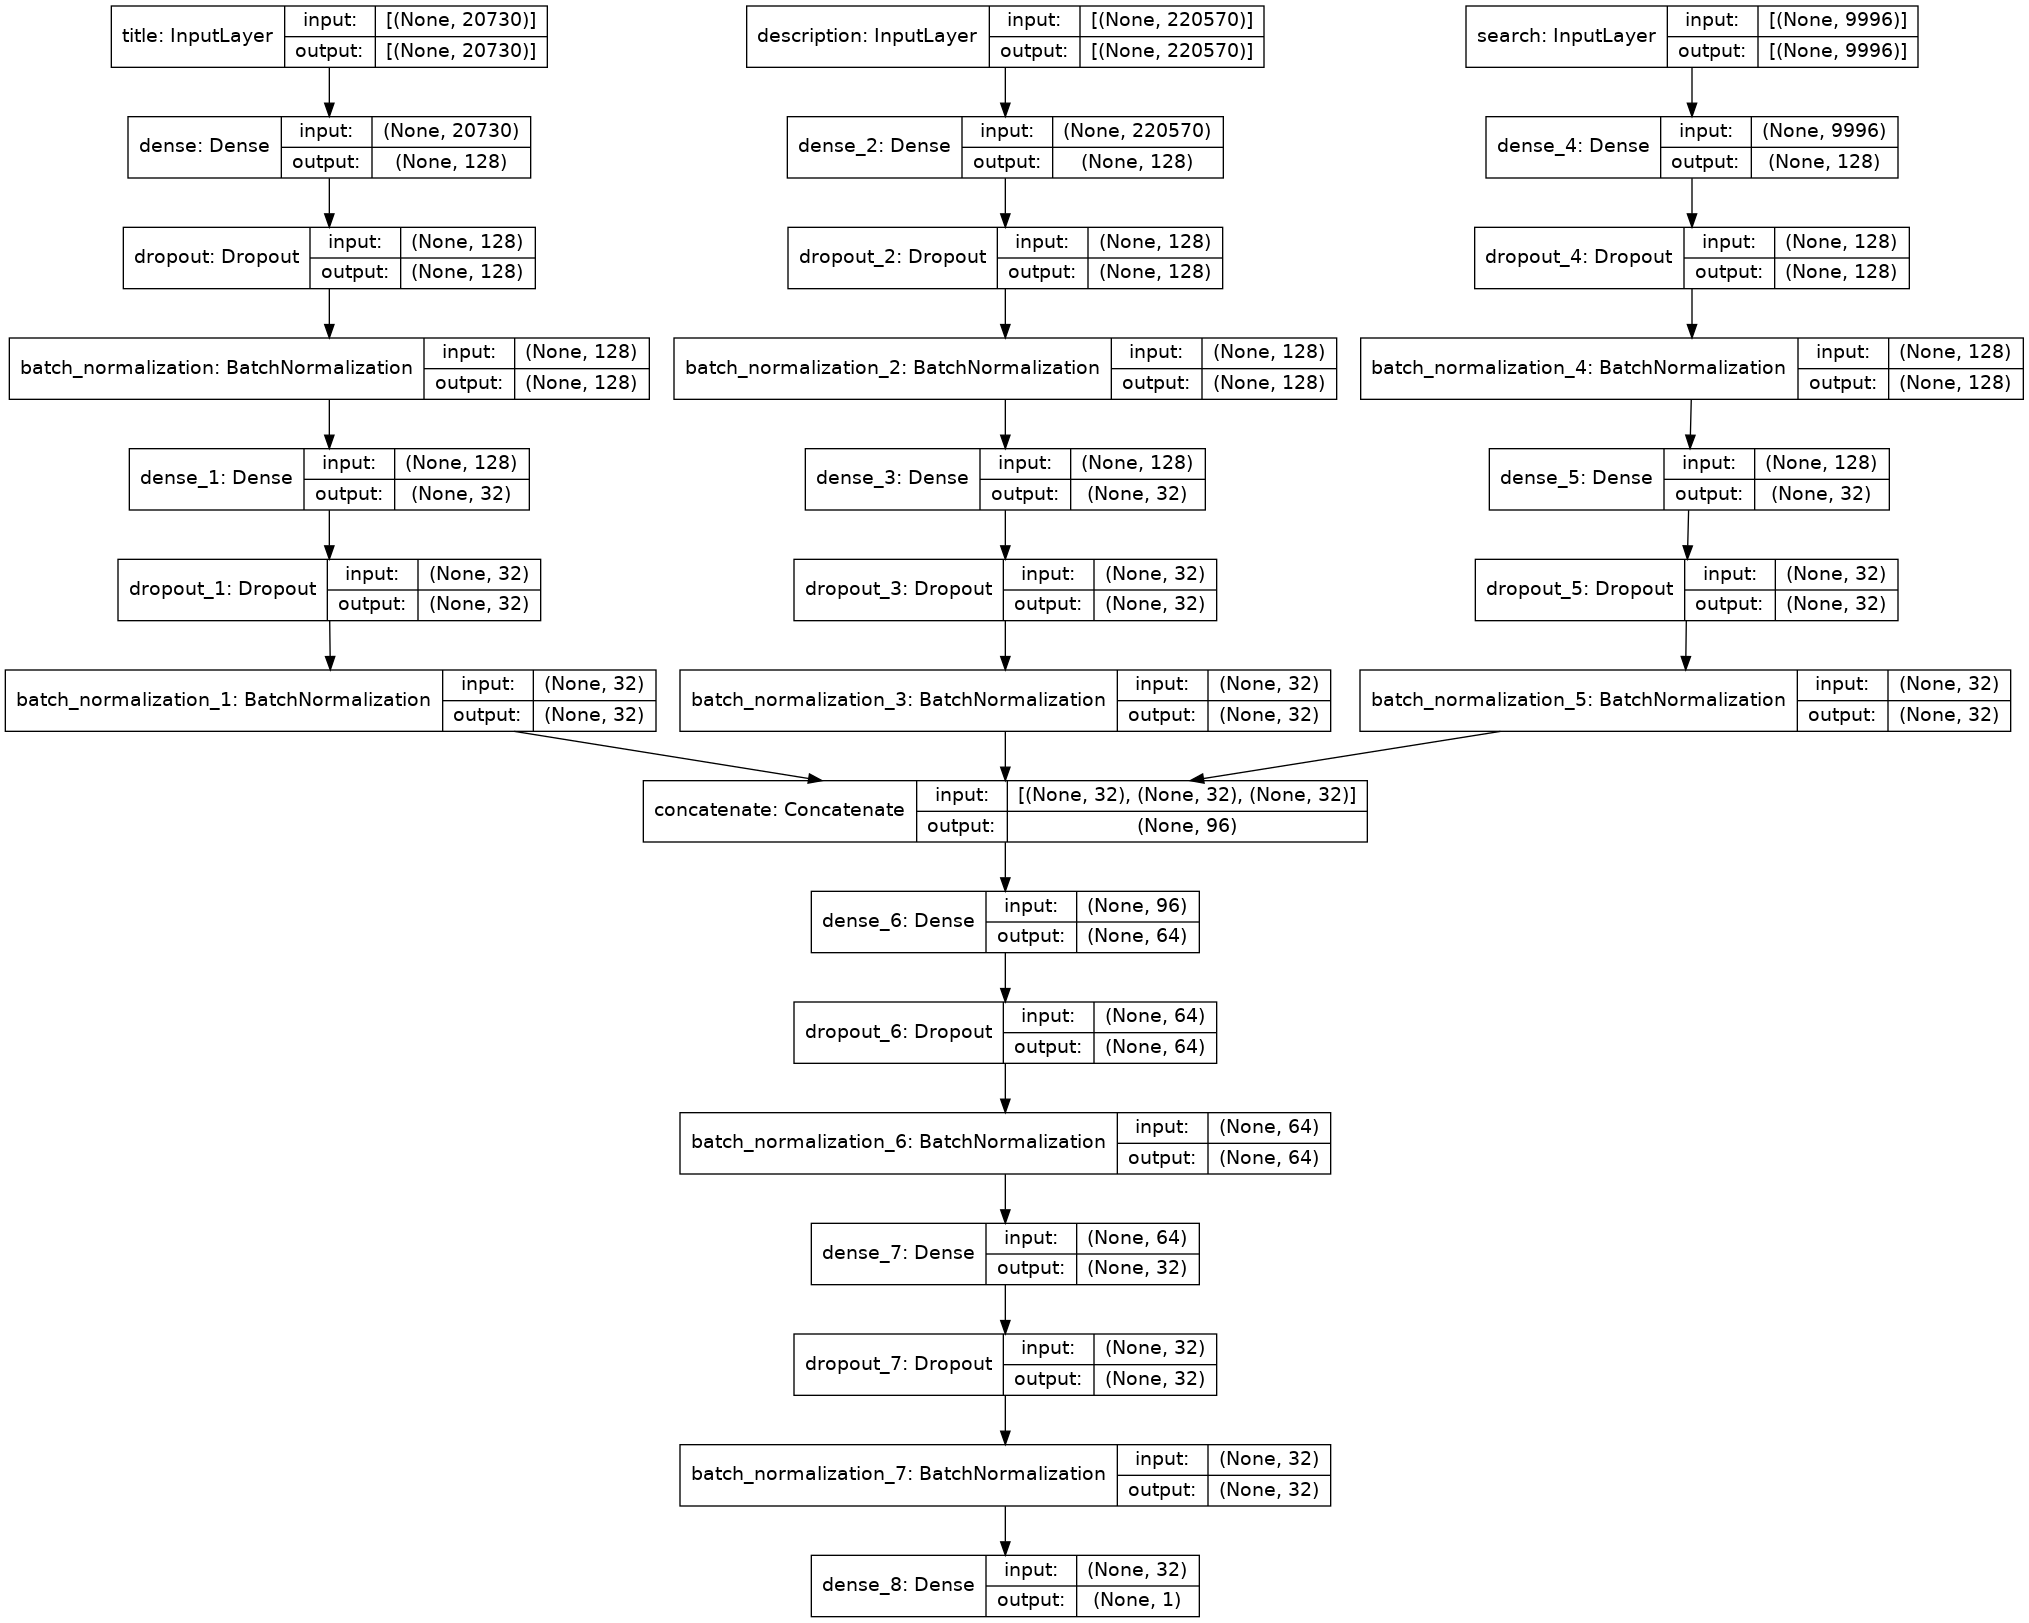

In [12]:
title_input = tf.keras.Input(shape=train_title.shape[1], name='title')
description_input = tf.keras.Input(shape=train_description.shape[1], name='description')
search_input = tf.keras.Input(shape=train_search.shape[1], name='search')


title_x = tf.keras.layers.Dense(128, activation='relu')(title_input)
title_x = tf.keras.layers.Dropout(0.3)(title_x)
title_x = tf.keras.layers.BatchNormalization()(title_x)
title_x = tf.keras.layers.Dense(32, activation='relu')(title_x)
title_x = tf.keras.layers.Dropout(0.3)(title_x)
title_x = tf.keras.layers.BatchNormalization()(title_x)

description_x = tf.keras.layers.Dense(128, activation='relu')(description_input)
description_x = tf.keras.layers.Dropout(0.3)(description_x)
description_x = tf.keras.layers.BatchNormalization()(description_x)
description_x = tf.keras.layers.Dense(32, activation='relu')(description_x)
description_x = tf.keras.layers.Dropout(0.3)(description_x)
description_x = tf.keras.layers.BatchNormalization()(description_x)

search_x = tf.keras.layers.Dense(128, activation='relu')(search_input)
search_x = tf.keras.layers.Dropout(0.3)(search_x)
search_x = tf.keras.layers.BatchNormalization()(search_x)
search_x = tf.keras.layers.Dense(32, activation='relu')(search_x)
search_x = tf.keras.layers.Dropout(0.3)(search_x)
search_x = tf.keras.layers.BatchNormalization()(search_x)

x = tf.keras.layers.concatenate([title_x, description_x, search_x])
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)

output_layer = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model([title_input, description_input, search_input], output_layer)
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=1e-4))
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 20730)]      0                                            
__________________________________________________________________________________________________
description (InputLayer)        [(None, 220570)]     0                                            
__________________________________________________________________________________________________
search (InputLayer)             [(None, 9996)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          2653568     title[0][0]                      
______________________________________________________________________________________________

In [14]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)
rlp = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1)

history = model.fit(
    [train_title, train_description, train_search], y_train, callbacks=[es, rlp], epochs=250, batch_size=64
)

Epoch 1/250
1158/1158 [==============================] - 14s 9ms/step - loss: 6.4659
Epoch 2/250
1158/1158 [==============================] - 11s 9ms/step - loss: 2.8181
Epoch 3/250
1158/1158 [==============================] - 12s 10ms/step - loss: 1.3167
Epoch 4/250
1158/1158 [==============================] - 11s 10ms/step - loss: 0.8946
Epoch 5/250
1158/1158 [==============================] - 11s 10ms/step - loss: 0.6856
Epoch 6/250
1158/1158 [==============================] - 12s 10ms/step - loss: 0.5592
Epoch 7/250
1158/1158 [==============================] - 11s 10ms/step - loss: 0.4768
Epoch 8/250
1158/1158 [==============================] - 11s 10ms/step - loss: 0.4148
Epoch 9/250
1158/1158 [==============================] - 11s 9ms/step - loss: 0.3731
Epoch 10/250
1158/1158 [==============================] - 11s 10ms/step - loss: 0.3432
Epoch 11/250
1158/1158 [==============================] - 12s 10ms/step - loss: 0.3157
Epoch 12/250
1158/1158 [==============================]

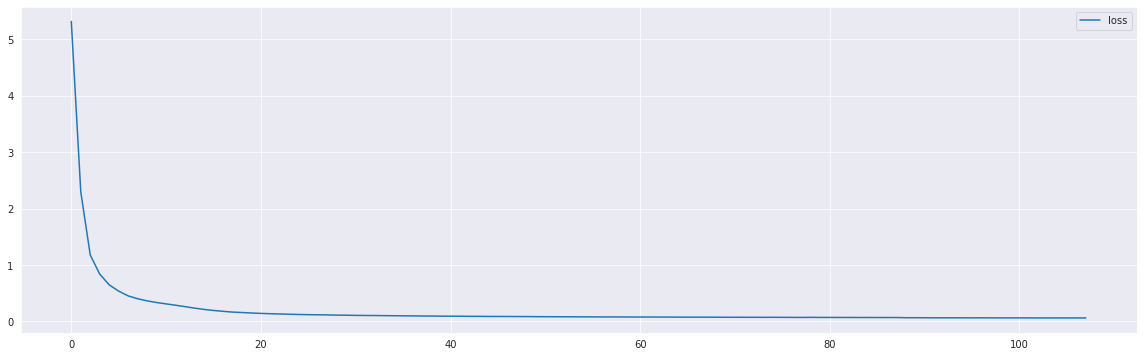

In [15]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(history.history)[['loss']].plot(ax=ax);

In [16]:
pd.DataFrame({
    'id': dtest.id.values,
    'relevance': np.clip(np.ravel(model.predict([test_title, test_description, test_search])), 1, 3)
}).to_csv('submission.csv', index=False)

# Reference
[Neural Collaborative Filtering](https://arxiv.org/pdf/1708.05031.pdf)